Saving nba_traditional_stats_2020_2025_all.csv to nba_traditional_stats_2020_2025_all (6).csv


/tmp/ipython-input-8-2221656418.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FTA_Rate', y='PLAYER', data=top10_fta, palette='plasma')


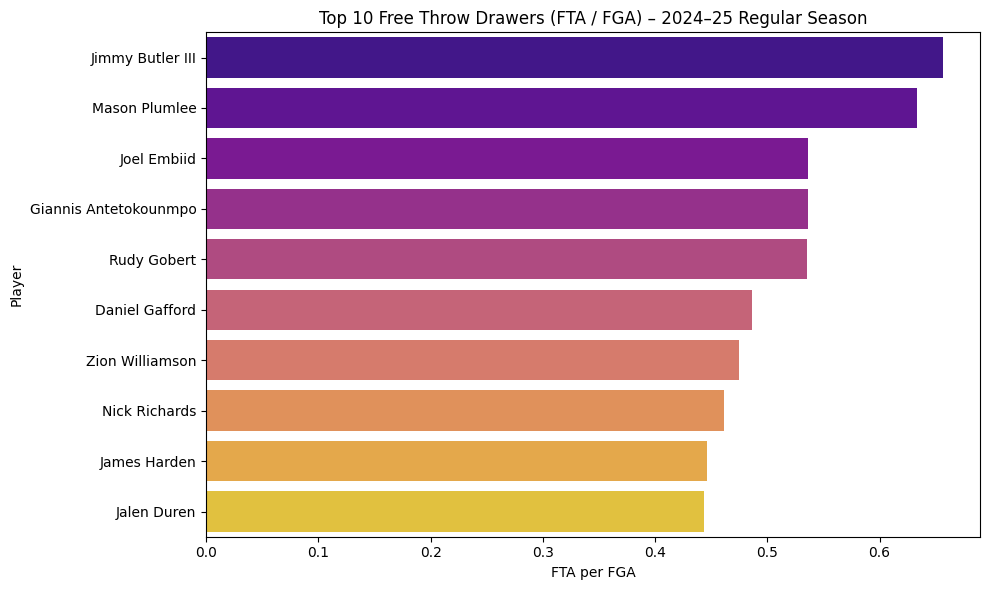

In [8]:
# 📁 Upload CSV
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# ✅ Define column headers manually
columns = [
    'Year', 'Season_Type', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM',
    'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
    'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TOV', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV'
]

# 📄 Read CSV with no header row, assign custom column names
df = pd.read_csv(filename, header=None, names=columns)

# 🧼 Clean & Filter
df['Season_Type'] = df['Season_Type'].str.replace('%20', ' ', regex=False)
df_rs = df[df['Season_Type'] == 'Regular Season'].copy()

df_rs = df_rs[df_rs['Year'] == '2024-25']
df_rs[['FGA', 'FTA']] = df_rs[['FGA', 'FTA']].apply(pd.to_numeric, errors='coerce')
df_rs = df_rs.dropna(subset=['FGA', 'FTA'])
df_rs = df_rs[df_rs['FGA'] > 200]
df_rs['FTA_Rate'] = df_rs['FTA'] / df_rs['FGA']

top10_fta = df_rs.sort_values(by='FTA_Rate', ascending=False).head(10)

# 📊 Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='FTA_Rate', y='PLAYER', data=top10_fta, palette='plasma')
plt.title('Top 10 Free Throw Drawers (FTA / FGA) – 2024–25 Regular Season')
plt.xlabel('FTA per FGA')
plt.ylabel('Player')
plt.tight_layout()
plt.show()
